# Import Libraries

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
import os

sys.path.append(os.path.abspath('.'))

In [2]:
from data_preprocessing.data_extractor import DataExtractor
from data_preprocessing.data_transformation import DataTransformer
import logging
import requests
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

In [3]:
extractor = DataExtractor()
global_sales_df = extractor.fetch_github_data(github_url="https://github.com/eweliwei/Data_Analysis_Engineering_Modeling/blob/main/global_sales.csv")

2025-05-22 00:53:23,027 - Fetching data from GitHub: https://raw.githubusercontent.com/eweliwei/Data_Analysis_Engineering_Modeling/main/global_sales.csv


In [4]:
# View sample records
print(global_sales_df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME           CITY STATE POSTALCODE  \
0    S10_1678         Land of

# Sample Data & Data Exploration

In [5]:
# View total rows and columns
global_sales_df.shape

(2823, 19)

In [6]:
# View sample data
global_sales_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Medium


In [7]:
# View data types
global_sales_df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
DEALSIZE            object
dtype: object

In [8]:
global_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  STATE            1337 non-null   object 
 16  POSTALCODE       2747 non-null   object 
 17  COUNTRY       

In [9]:
# Numerical columns
global_sales_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
# Categorical columns
global_sales_df.describe(include='object')

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
count,2823,2823,2823,2823,2823,2823,1337,2747,2823,2823
unique,252,6,7,109,92,73,16,73,19,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,Madrid,CA,28034,USA,Medium
freq,38,2617,967,52,259,304,416,259,1004,1384


In [11]:
# Missing Values
print(global_sales_df.isnull().sum())

# Missing values as a percentage
missing_percent = global_sales_df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\n Missing Values (%):")
print(missing_percent)

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
DEALSIZE              0
dtype: int64

 Missing Values (%):
STATE         52.639036
POSTALCODE     2.692171
dtype: float64


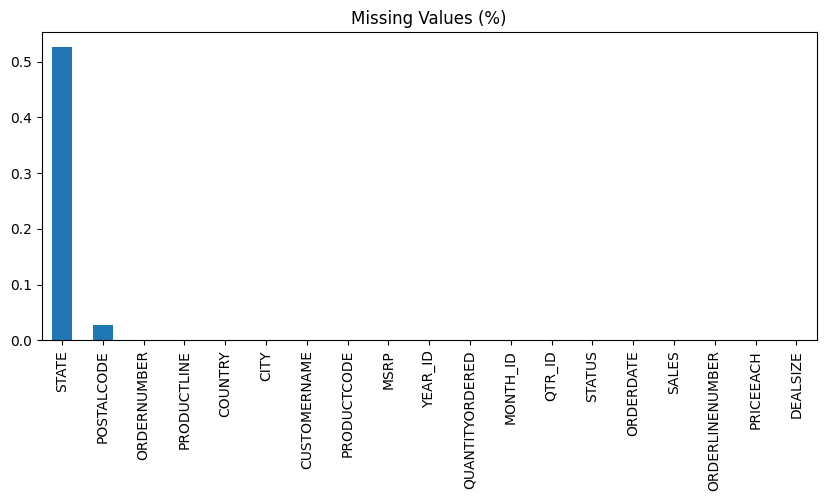

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 4))
global_sales_df.isnull().mean().sort_values(ascending=False).plot.bar()
plt.title("Missing Values (%)")
plt.show()

In [13]:
# Identify Duplcated Records
print(f"\nTotal Duplicates: {global_sales_df.duplicated().sum()}")
print("\nSample Records (if any):")
print(global_sales_df[global_sales_df.duplicated(keep=False)].head())


Total Duplicates: 0

Sample Records (if any):
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, CITY, STATE, POSTALCODE, COUNTRY, DEALSIZE]
Index: []


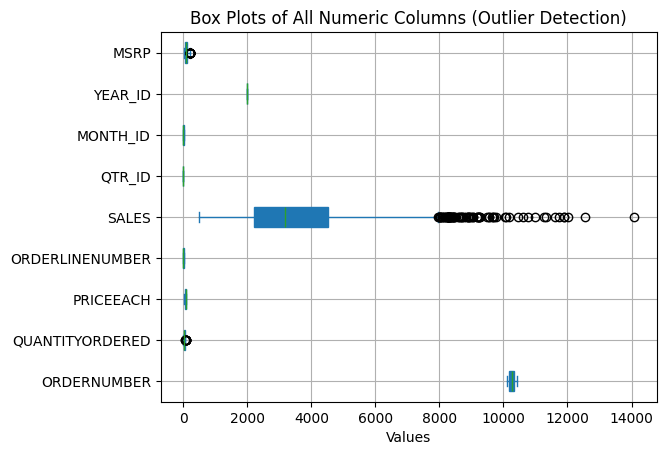

In [14]:
# Identify outliers with boxplots (numerical columns)
global_sales_df.select_dtypes(include=['int64', 'float64']).plot.box(
    vert=False,
    patch_artist=True,
    grid=True
)
plt.title("Box Plots of All Numeric Columns (Outlier Detection)")
plt.xlabel("Values")
plt.show()

# Data Transformation

In [15]:
transformer = DataTransformer(global_sales_df)
transformer.format_column_names_to_snake_case()
transformer.trim_spaces()
transformer.fill_missing_numeric()
transformer.fill_missing_categorical()
transformer.convert_datetime_col(['orderdate'])
transformer.standardize_text_columns(['status'])
cleaned_df = transformer.get_transformed_data()

In [16]:
# View sample data
cleaned_df.head(5).style.set_properties(**{'text-align': 'left'})

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
0,10107,30,95.700000,2,2871.000000,2003-02-24 00:00:00,SHIPPED,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.350000,5,2765.900000,2003-05-07 00:00:00,SHIPPED,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NA,51100,France,Small
2,10134,41,94.740000,2,3884.340000,2003-07-01 00:00:00,SHIPPED,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NA,75508,France,Medium
3,10145,45,83.260000,6,3746.700000,2003-08-25 00:00:00,SHIPPED,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.000000,14,5205.270000,2003-10-10 00:00:00,SHIPPED,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NA,USA,Medium
